[View in Colaboratory](https://colab.research.google.com/github/alfphie/ml-assignment/blob/master/Breast_Cancer_ML.ipynb)

# Machine Learning Module Assignment


## Data & Problem 

### Problem Statement

'Use the **Supervised** Machine Learning Workflow to process and transform 'Wisconsin Breast Cancer' data to create **classification** predicition models. From the models we create we will pick the one we think most suited to our needs, this model will aid in predicting if a tumour is malignant (cancerous) or benign (non-cancerous) which will help medical professionals in providing the necessary treatment as early as possible.'

**Why is it important to detect a Cancer early?**

Cancer that's diagnosed at an early stage, when it isn't too large and hasn't spread, is more likely to be treated successfully. If cancer spreads, effective treatment becomes more difficult, and generally a person's chances of surviving are much lower.

90% of Women diagnosed with breast cancer at the earliest stage survive - compared to around 15% for women diagnosed with the most advanced stage of disease.

~ Cancer Research UK




### Data

The data we've been given is related to information about the tumor itself - from my research it appears this can definately be used to make an accurate prediction but if we wanted to create a model with increased accuracy we might want to obtain more information about the patient themselves - e.g. lifestyle choices and genetic data.

The data appears to already have been processed for us. The data was obtained by taking fluid-samples from the patients and a graphical computer program called Xcyt - which can take a digital scan and perform analysis on it. The program used an algorithm to work out 10 features from the sampled cells - from this it computes the Mean, Standard Error and Worst (mean of the three largest values) for each feature, returning a total of 30 feature values (e.g. for radius we have radius_mean, radius_se, radius_worst).

We've been given 10 Measurements:

1. Radius - from center to points on the perimeter
2. Texture - standard deviation of gray-scale values 
3. Perimeter - size of the core tumor
4. Area - area of the tumor
5. Smoothness - local variation in the radius lengths
6. Compactness - perimeter^2 / area - 1.0
7. Concavity - severity of concave portions of the contour
8. Concave Points - number of concave portions of the contour
9. Symmetry 
10. Fractal Dimension - value for "coastline approximation" - 1

The target column we have is:

Diagnosis - this can either be M ('malign') or B ('benign')

Since this is a binary classification problem we will use label encoding i.e. encode the M to 1 and B to 0.

###Models


**Logistic Regression** - Parametric

Logistic regression is used for prediction of the probability of an event occuring by fitting data to a logistic curve. Despite the use of the word 'regression' it is a model used for classification problems. It gets the name Logistic due to its use of the Logistic (Sigmoidal) Function

**Random Forest** - Parametric

Involves creating multiple Decision trees when running the model on the training data - from these numerous decision tree it will return the modal result - i.e. the result that the majority of the decision trees came to. It is an ensemble method - meaning it creates multiple models and is also used for classification problems. 

Random Forest aims to solve the issue with Decision Trees - that they often overfit the data - by creating multiple decision trees and taking an average

## **Data Preprocessing**



In [0]:
# importing libraries
import pandas as pd # used for data manipulation/analysis
from sklearn.linear_model import LogisticRegression # our Logistic Regression model
from sklearn.model_selection import train_test_split # splitting data into test and train
from sklearn.ensemble import RandomForestClassifier # our Random Forest model
from sklearn.cluster import KMeans # our clustering algorithm
import matplotlib.pyplot as plt # plotting graphs

In [0]:
# import data
csv_uri = "https://raw.githubusercontent.com/alfphie/ml-assignment/master/wdbc.data"

# provide column headers
column_headers = ["id_number", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", 
                  "concavity_mean", "concave_point_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", 
                  "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_point_se", "symmetry_se", "fractal_dimension_se",
                  "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                  "concave_point_worst", "symmetry_worst", "fractal_dimension_worst"]

data_original = pd.read_csv(csv_uri, names=column_headers, index_col=False)

# make a copy of the original data
data = data_original.copy(deep=True)

In [4]:
# ensure we don't have any gaps
data.isnull().values.any()

False

In [5]:
# quick overview of our data
data.head()

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_point_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


From this I can see that we have a few bits that require our attention:

*   id_number looks to be an identifier for the patient and will offer no value in making our predictions.
*   diagnosis is our target column but contains characters - we will have to change these to integers




In [0]:
# removing id_number columns
data.drop(["id_number"], axis=1, inplace=True)

In [0]:
# here we map 'M's in diagnosis column to 1 and 'B's to 0
diagnosis_map = {'M': 1, 'B': 0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

In [8]:
# checking that all data remaining in our table is of a type that we can use
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_point_mean         float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_point_se           float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_point_worst 

In [0]:
# pulling the data from our feature columns
feature_columns = data.columns.tolist()
feature_columns.remove("diagnosis")

In [0]:
X = data[feature_columns].values # Assigning X our input/features
y = data["diagnosis"].values # Assigning y our output/target

### Clustering

We will use K-Means on our data in an unsupervised manner - i.e. we won't pass in the targets -  this is especially useful for identifying any potential patterns in the data. We will then pass the results of this clustering into our supervised models to see if it aids in the accurcacy of our predictions.

To find the number of clusters we run the K-Means on the data with a varying number of clusters and plot that against the mean distance to the centroid. We then choose the number of clusters we will used based on the 'elbow point' - the point where we stop seeing any meaningful decrease in the mean distance to the centroid as number of clusters increases.

When we pass the cluster number into our table we will use One-hot encoding. We do this because the cluster number is just a categorical value as opposed to a numerical value i.e. cluster 2 is not double the value of cluster 1. If we were just to use the cluster number the Algorithm would see this as having a value. 

Text(4,7.79431e+07,'Elbow')

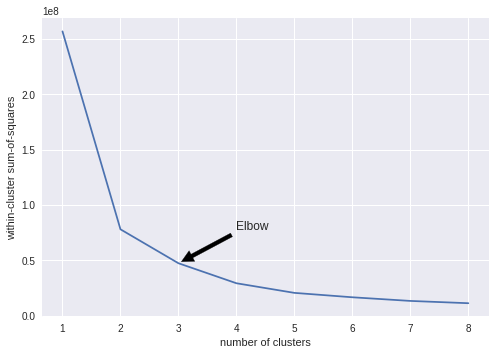

In [11]:
# running through a range of no. of cluster to find elbow point
inertia = []
for i in range(1, 9):
  KMean = KMeans(n_clusters=i)
  KMean.fit(X)
  inertia.append(KMean.inertia_)
plt.plot(range(1,9), inertia)
plt.xlabel('number of clusters')
plt.ylabel('within-cluster sum-of-squares')
plt.annotate('Elbow', xy=(3, inertia[2]), xytext=(4, inertia[1]), arrowprops=dict(facecolor='black', shrink=0.05))

In [12]:
# using the elbow point we found
KMean = KMeans(n_clusters=3)
KMean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
cluster_1 = []
cluster_2 = []
cluster_3 = []

# function to one-hot encode the clusters
def cluster_onehot(cluster):
  if cluster == 0:
    cluster_1.append(1)
    cluster_2.append(0)
    cluster_3.append(0)
  elif cluster == 1:
    cluster_1.append(0)
    cluster_2.append(1)
    cluster_3.append(0)
  else:
    cluster_1.append(0)
    cluster_2.append(0)
    cluster_3.append(1)

In [0]:
# applying the function to each cluster label
for x in KMean.labels_:
  cluster_onehot(x)

In [15]:
# joining one-hot encoded clusters with data in a new dataframe - this will allow for comparison of accuracy w and w/o cluster data
clusters = pd.DataFrame({"cluster_1": cluster_1, "cluster_2": cluster_2, "cluster_3": cluster_3})
data_with_cluster = data.join(clusters)
data_with_cluster.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_point_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,cluster_1,cluster_2,cluster_3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1,0


In [0]:
# again pulling our data from our feature columns, this time with clusters included
feature_columns = data_with_cluster.columns.tolist()
feature_columns.remove("diagnosis")

In [0]:
Xc = data_with_cluster[feature_columns].values # Assigning features to Xc to allow comparison with X

## Models

First I will run through our Logistic Regression and Random Forest models to see which appears to provide the highest accuracy while maintaing a good test:train ratio. From there we will further try to optimise the model we choose by adjusting the Hyper Parameters 

In [0]:
from sklearn import preprocessing

In [0]:
# method used to return model scores
def model_scores(model, X_train, y_train, X_test, y_test):
  scaler = preprocessing.StandardScaler().fit(X_train)
  X_train_scaled = scaler.transform(X_train)  # Scales the training data so it is centered around 0
  X_test_scaled = scaler.transform(X_test)    # I found scaling the data made a big improvement to my Logistic Regression Model
  model.fit(X_train_scaled, y_train)
  train_score = model.score(X_train_scaled, y_train) # runs training set through model
  test_score = model.score(X_test_scaled, y_test) # runs testing set, this is the result we focus more on
  return train_score, test_score

In [0]:
# plots our accuracy comparison from cross validation
def plot_accuracy_comparison(y1, y1_label, y2, y2_label, title):
  plt.plot(range(len(y1)), y1, 'b', label=y1_label)
  plt.plot(range(len(y2)), y2, 'r', label=y2_label) 
  plt.title(title)
  plt.xlabel('Random State')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [0]:
# plots ratio comparison from cross validation
def plot_ratio(y1, y1_label, y2, y2_label, title):
  plt.plot(range(len(y1)), y1, 'b', label=y1_label)
  plt.plot(range(len(y2)), y2, 'r', label=y2_label)
  plt.title(title)
  plt.xlabel("Random State")
  plt.ylabel("Test:Train ratio")
  plt.legend()
  plt.show()

In [0]:
def array_average(array):
  sum = 0
  for x in array:
    sum += x
  avg = sum/len(array)
  return avg

### Logistic Regression


In [0]:
lr_clf = LogisticRegression()

Here I am going to compare the accuracy of the data without clusters with the data containing the added cluster numbers from our K-Means. I will from this view select wether or not to continue using the data with clusters in my Logistic Regression model. We will use visulizations to help get a better idea of the accuracy and also run the test across a multitude of random states.

In [0]:
lr_training = []
lr_testing = []
lr_ratio = []
lr_training_cluster = []
lr_testing_cluster = []
lr_ratio_cluster =[]

for i in range(0, 20):
  # split the data and get the model's accuracy
  Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, y, test_size=0.3, random_state=i)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  train_score, test_score = model_scores(lr_clf, X_train, y_train, X_test, y_test)
  cluster_train_score, cluster_test_score = model_scores(lr_clf, Xc_train, yc_train, Xc_test, yc_test)
  
  # store the results with no clusters
  lr_training.append(train_score)
  lr_testing.append(test_score)
  lr_ratio.append(test_score / train_score)
  
  # store the results with clusters
  lr_training_cluster.append(cluster_train_score)
  lr_testing_cluster.append(cluster_test_score)
  lr_ratio_cluster.append(cluster_test_score / cluster_train_score)


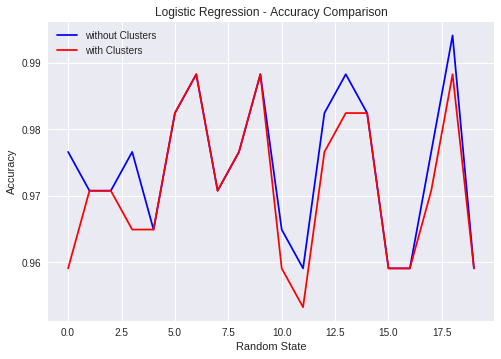

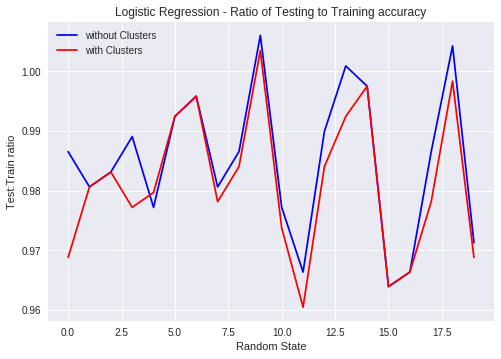

In [25]:
plot_accuracy_comparison(lr_testing, "without Clusters", lr_testing_cluster, "with Clusters", "Logistic Regression - Accuracy Comparison")


plot_ratio(lr_ratio, "without Clusters", lr_ratio_cluster, "with Clusters", "Logistic Regression - Ratio of Testing to Training accuracy")

In [26]:
# get our averages from cross validation
lr_avg = array_average(lr_testing)
lr_c_avg = array_average(lr_testing_cluster)
lr_ratio_avg = array_average(lr_ratio)
lr_ratio_c_avg = array_average(lr_ratio_cluster)


print("Logistic Regression with Clusters:\n\t Accruacy: {0:.3f}%\n\t Ratio: {1:.6f}\n".format(lr_c_avg*100, lr_ratio_c_avg))
print("Logistic Regression without Clusters:\n\t Accruacy: {0:.3f}%\n\t Ratio: {1:.6f}".format(lr_avg*100, lr_ratio_avg))

Logistic Regression with Clusters:
	 Accruacy: 97.135%
	 Ratio: 0.981345

Logistic Regression without Clusters:
	 Accruacy: 97.456%
	 Ratio: 0.985098


## Random Forest

In [0]:
rf_clf = RandomForestClassifier(n_estimators=50, max_features=15, max_depth=11)

In [0]:
rf_training = []
rf_testing = []
rf_ratio = []
rf_training_cluster = []
rf_testing_cluster = []
rf_ratio_cluster =[]
for i in range(0, 20):
  # split the data and get the model's accuracy
  Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, y, test_size=0.3, random_state=i)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  train_score, test_score = model_scores(rf_clf, X_train, y_train, X_test, y_test)
  cluster_train_score, cluster_test_score = model_scores(rf_clf, Xc_train, yc_train, Xc_test, yc_test)
  
  # store the results with no clusters
  rf_training.append(train_score)
  rf_testing.append(test_score)
  rf_ratio.append(test_score / train_score)
  
  # store the results with clusters
  rf_training_cluster.append(cluster_train_score)
  rf_testing_cluster.append(cluster_test_score)
  rf_ratio_cluster.append(cluster_test_score / cluster_train_score)

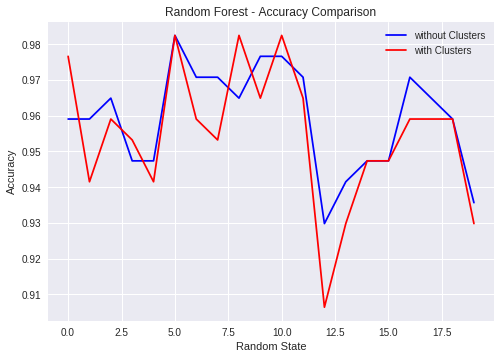

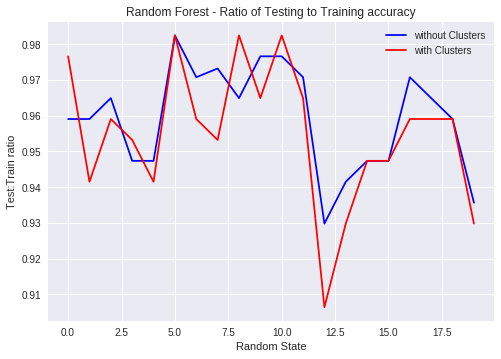

In [29]:
plot_accuracy_comparison(rf_testing, "without Clusters", rf_testing_cluster, "with Clusters", "Random Forest - Accuracy Comparison")


plot_ratio(rf_ratio, "without Clusters", rf_ratio_cluster, "with Clusters", "Random Forest - Ratio of Testing to Training accuracy")


In [30]:
rf_avg = array_average(rf_testing)
rf_c_avg = array_average(rf_testing_cluster)
rf_ratio_avg = array_average(rf_ratio)
rf_ratio_c_avg = array_average(rf_ratio_cluster)
print("Random Forest with Clusters:\n\t Accruacy: {0:.3f}% \n\t Ratio: {1:.6f}\n".format(rf_c_avg*100, rf_ratio_c_avg))
print("Random Forest without Clusters:\n\t Accruacy: {0:.3f}% \n\t Ratio: {1:.6f}".format(rf_avg*100, rf_ratio_avg))

Random Forest with Clusters:
	 Accruacy: 95.497% 
	 Ratio: 0.954971

Random Forest without Clusters:
	 Accruacy: 95.936% 
	 Ratio: 0.959479


### Comparing Logistic Regression & Random Forest

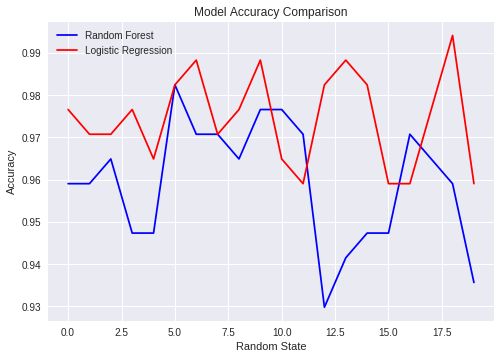

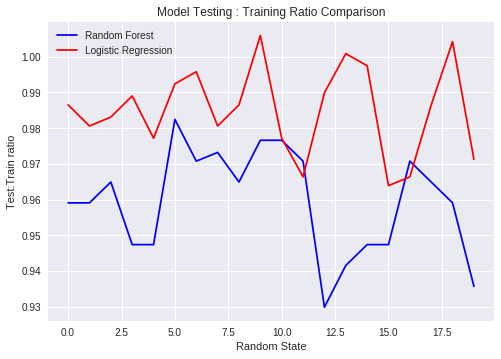

In [31]:
plot_accuracy_comparison(rf_testing, "Random Forest", lr_testing, "Logistic Regression", "Model Accuracy Comparison")

plot_ratio(rf_ratio, "Random Forest", lr_ratio, "Logistic Regression", "Model Testing : Training Ratio Comparison")

In [32]:
print("Random Forest:\n\t Accruacy: {0:.3f}% \n\t Ratio: {1:.6f}\n".format(rf_avg*100, rf_ratio_avg))
print("Logistic Regression:\n\t Accruacy: {0:.3f}% \n\t Ratio: {1:.6f}".format(lr_avg*100, lr_ratio_avg))

Random Forest:
	 Accruacy: 95.936% 
	 Ratio: 0.959479

Logistic Regression:
	 Accruacy: 97.456% 
	 Ratio: 0.985098


From this I've made the decision to continue with Logistic Regression and attempt tweaking the hyper parameters to make for an even more accurate model. Both models look slightly overfitted as their ratio is quite a little bit below 1 (indicating the accuracy on the training set is overperforming the testing set). 

The Logistic Regression model looks more stable and accurate.

With the changes to the Logistic Regression hyper parameters I'm hoping to be able to further increase the accuracy. I''ll also be looking carefully at the graphs produced from the Cross validation to ensure the model is also stable (i.e. not displaying big swings in accuracy and/or ratio between the training and testing set)

### Logistic Regression cont.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# creating a parameter grid with a variety of settings
parameters = {
    'penalty': ['l1','l2'], 
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'tol': [5e-6 ,1e-6, 5e-5, 1e-5, 0.0005, 0.001],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced']
}

In [0]:
# give the grid search the model we'd like to use
clf = GridSearchCV(LogisticRegression(), parameters)

In [0]:
# scaling the data before running the grid search
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [37]:
# fitting to data
clf.fit(X_scaled,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tol': [5e-06, 1e-06, 5e-05, 1e-05, 0.0005, 0.001], 'fit_intercept': [True, False], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# passing the optimal parameters returned from the grid search
tuned_clf = LogisticRegression(**clf.best_params_)

In [0]:
# running cross validation on model
training = []
testing = []
ratio = []
for i in range(0, 20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  train_score, test_score = model_scores(tuned_clf, X_train, y_train, X_test, y_test)
  
  training.append(train_score)
  testing.append(test_score)
  ratio.append(test_score / train_score)

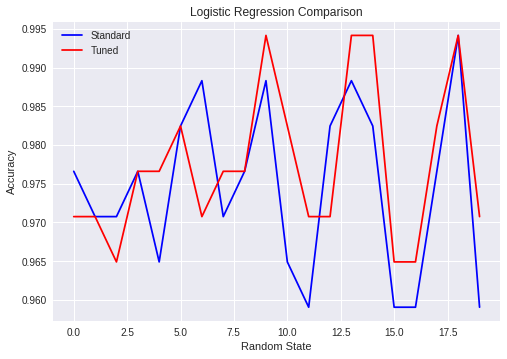

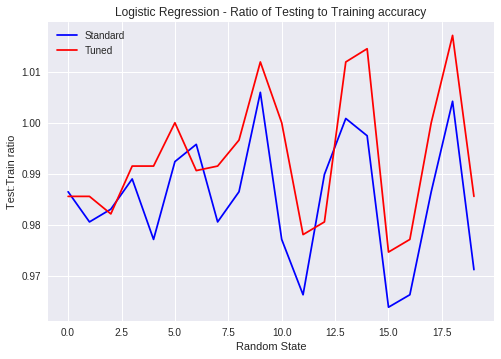

In [40]:
plot_accuracy_comparison(lr_testing, "Standard", testing, "Tuned", "Logistic Regression Comparison")


plot_ratio(lr_ratio, "Standard", ratio, "Tuned", "Logistic Regression - Ratio of Testing to Training accuracy")

In [41]:
avg = array_average(testing)
ratio_avg = array_average(ratio)
print("Logistic Regression with tuned parameters:\n\t Accruacy: {0:.3f}% \n\t Ratio: {1:.6f}".format(avg*100, ratio_avg))

Logistic Regression with tuned parameters:
	 Accruacy: 97.749% 
	 Ratio: 0.993370


## Discussion

**Logistic Regression (no tuning hyper parameters)**

The Model performed well, averaging at 97.456%. Interestingly it appears that when the data is passed in with clusters it never seems able to outperform the data without clusters as can be seen on the plot below. I found the model had a big increase in accuracy when I used 'Standard Scaler' to scale the data (this works by taking away the mean and scaling to unit variance).

This model also appears to not be incredibly consistent. Just from looking at the graph (below) the without clusters line looks like it has a low of 0.96 and high of around 0.993 - which is a 0.033 difference. 


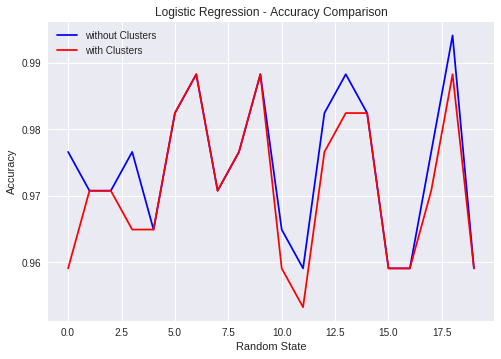

In [43]:
plot_accuracy_comparison(lr_testing, "without Clusters", lr_testing_cluster, "with Clusters", "Logistic Regression - Accuracy Comparison")



---

The graph below shows that although the model is more accurate on the training data, there are points where the testing data peaks above - there is also not a massive difference between the lines.

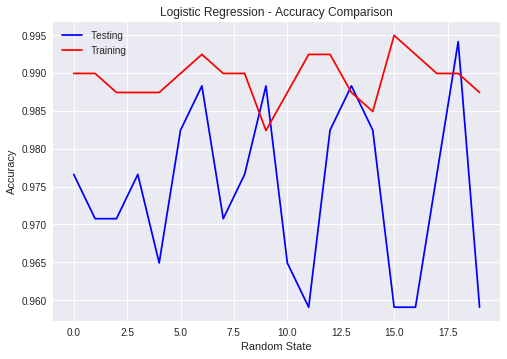

In [48]:
plot_accuracy_comparison(lr_testing, "Testing", lr_training, "Training", "Logistic Regression - Accuracy Comparison")



---


This model also looks like it could be slightly better tuned as at the moment it looks a little overfitted to the testing data. This can be seen from the fact that the line, in the graph below, rarely goes above the the 1.00 mark (this would indicate testing data outperforming training data) this makes me believe that there is room to tweak the model and bring the ratio closer to 1.00 which in turn can hopefully provide better average accuracy from our testing data.

This lends into my recommendation for this model which would be to try and alter the hyper parameters to produce a model that produces consistent results of a higher accuracy.




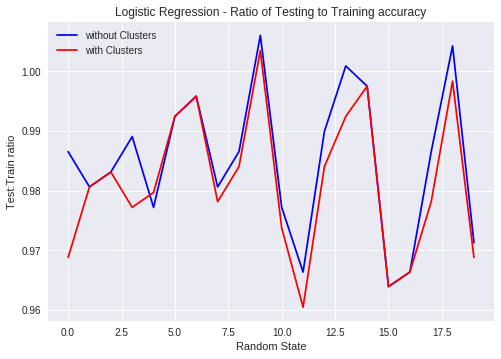

In [44]:
plot_ratio(lr_ratio, "without Clusters", lr_ratio_cluster, "with Clusters", "Logistic Regression - Ratio of Testing to Training accuracy")

**Random Forest**

On this model the data with clusters did sometimes outperform the data without clusters. This model on a whole produces a lower average accuracy than Logistic Regression and also has big fluctuations in the results - on some tests there was a 0.05 difference between the highest and lowest accuracy returned from the cross validation. I'm sure with some tuning the model could be improved, but I think it would be hard to get it to the level of Logistic Regression (requiring an increase in the average of around 0.02). 

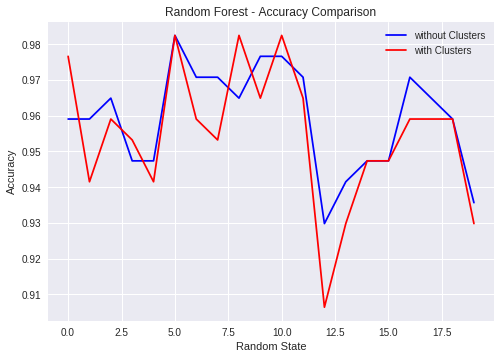

In [45]:
plot_accuracy_comparison(rf_testing, "without Clusters", rf_testing_cluster, "with Clusters", "Random Forest - Accuracy Comparison")



---


The graph below gives a good idea of just how overfitted to the training data this model is - with the model having near perfect accuracy on the training data.

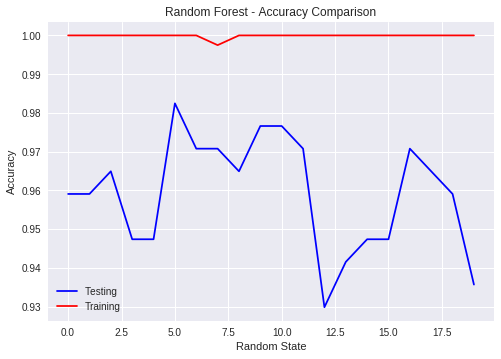

In [47]:
plot_accuracy_comparison(rf_testing, "Testing", rf_training, "Training", "Random Forest - Accuracy Comparison")



---
As you can see from the ratio graph below the model looks very overfitted to the training data, the ratio line is consistently below 0.985, this is a common problem for decision trees but is lessened by the use of Random Forest - having a little look online I can see that this can be a common problem and that it can be addressed with some hyper parameter tuning.

My recommendation for this model is to not carry on with it, instead spend more time trying to improve the Logistic Regression model

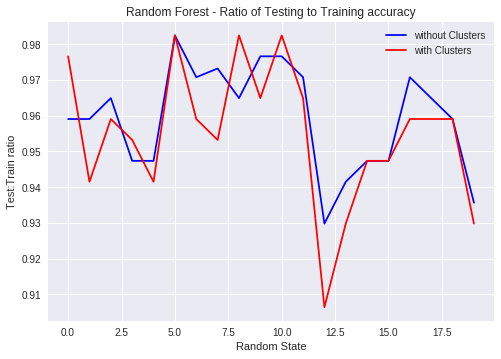

In [46]:
plot_ratio(rf_ratio, "without Clusters", rf_ratio_cluster, "with Clusters", "Random Forest - Ratio of Testing to Training accuracy")

**Random Forest vs Logistic Regression**

Briefly we will take a quick look at the direct comparison. As can be seen in the graph below - Logistic Regression consistently outperforms the Random Forest while also maintaing a more consistent line (less difference between highest and lowest points) 

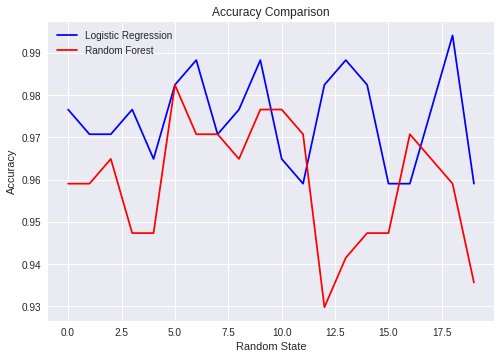

In [49]:
plot_accuracy_comparison(lr_testing, "Logistic Regression", rf_testing, "Random Forest", "Accuracy Comparison")

The graph below compares the testing:training ratio for Random Forest and Logistic Regression. This gives a good idea of just how overfitted the Random Forest Model is. 

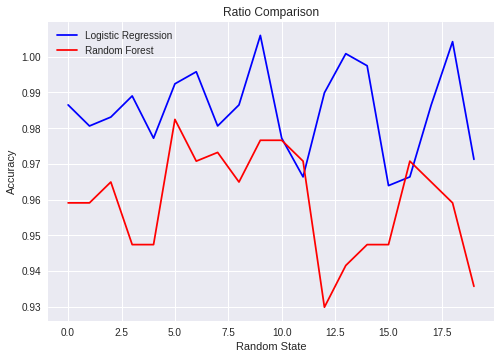

In [51]:
plot_accuracy_comparison(lr_ratio, "Logistic Regression", rf_ratio, "Random Forest", "Ratio Comparison")

From this direct comparison it's further reinforced my initial thought of carrying on with Logistic Regression as opposed to Random Forest.

**Logistic Regression Tuned**

Having used a Grid Search to try and find the optimal hyper parameters and then passing these into the model we can see that it has resulted in a more accurate model which is also pretty consistent with a difference of about 0.29 (from 0.994 to 0.965) which is an improvment on our previous logistic regression model. The average accuracy of 97.75% is also an improvement on our Logistic Regression model.


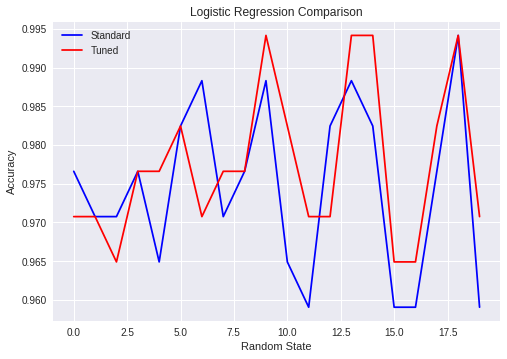

In [52]:
plot_accuracy_comparison(lr_testing, "Standard", testing, "Tuned", "Logistic Regression Comparison")



---


We can also see that the testing:training ratio is more centered around the 1.00 line, indicating that the model is better fitted to the data than our previous 'standard' logistic regression model

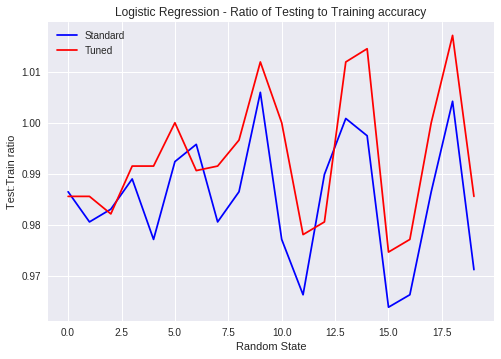

In [53]:
plot_ratio(lr_ratio, "Standard", ratio, "Tuned", "Logistic Regression - Ratio of Testing to Training accuracy")

My Recommendation would be to continue onwards with the Logistic Regression model. In the longer term I would suggest gathering more data points on external factors as opposed to information on only the tumor to see if that can provide any increase in the accuracy. If this was done I'm sure the hyper parameters would need to be retuned to create the optimal model.

The Logistic Regression model on a whole was more Robust and also maintained a better performance. I think at an accuracy of 97.75% this model could definately be used by medical professionals as a tool to help them come to a conclusion on wether a cancer is 'benign or 'malignant' - I think prediction tools like this when combined with the expert knowledge of a medical professional who can maybe identify the 2.25% of times the prediction is incorrect is the optimal approach as opposed to soley relying on one or the other. 

Given more time I would've like to try other clustering algorithms to see if any of them could've been used to help improve the accuracy of the model.